# **Grafik keanggotaan nilai Cuaca, Intensitas Kendaraan dan Jam**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def representasi_linear_turun(x, start, end):
    return np.piecewise(x, [x <= start, (x > start) & (x < end), x >= end], [1, lambda x: (end - x) / (end - start), 0])

def representasi_linear_naik(x, start, end):
    return np.piecewise(x, [x <= start, (x > start) & (x < end), x >= end], [0, lambda x: (x - start) / (end - start), 1])

def representasi_segitiga(x, start, mid, end):
    return np.piecewise(x, [(x >= start) & (x < mid), x == mid, (x > mid) & (x <= end)], [lambda x: (x - start) / (mid - start), 1, lambda x: (end - x) / (end - mid)])

def representasi_trapesium(x, start, mid_left, mid_right, end):
    return np.piecewise(x, [(x >= start) & (x < mid_left), (x >= mid_left) & (x <= mid_right), (x > mid_right) & (x <= end)], [lambda x: (x - start) / (mid_left - start), 1, lambda x: (end - x) / (end - mid_right)])

def print_header(text, width=30, char='-'):
    centered_text = text.center(width)
    horizontal_line = char * width
    print(horizontal_line)
    print(centered_text)
    print(horizontal_line)

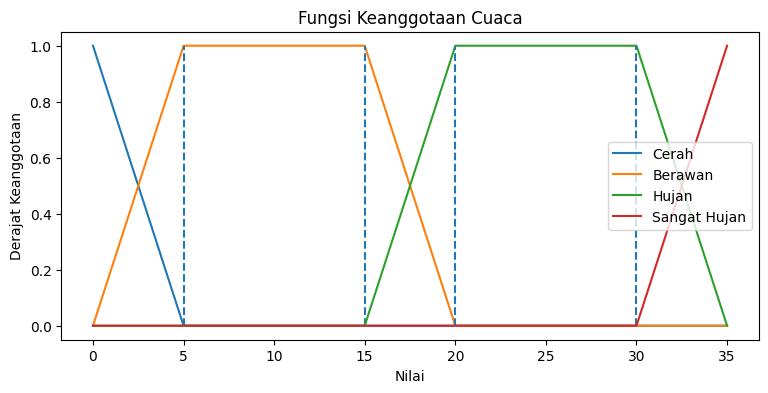

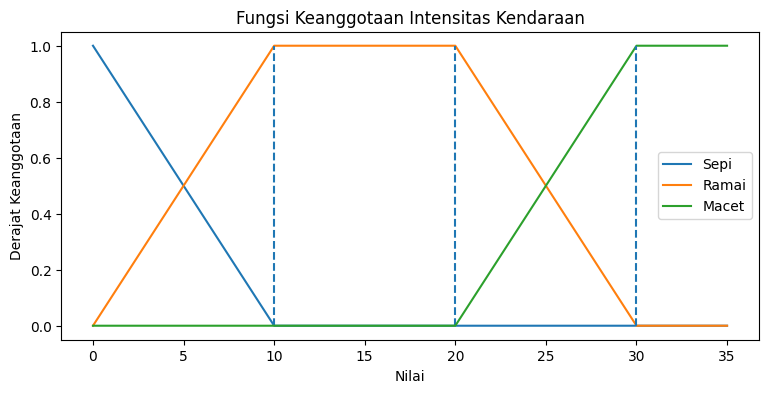

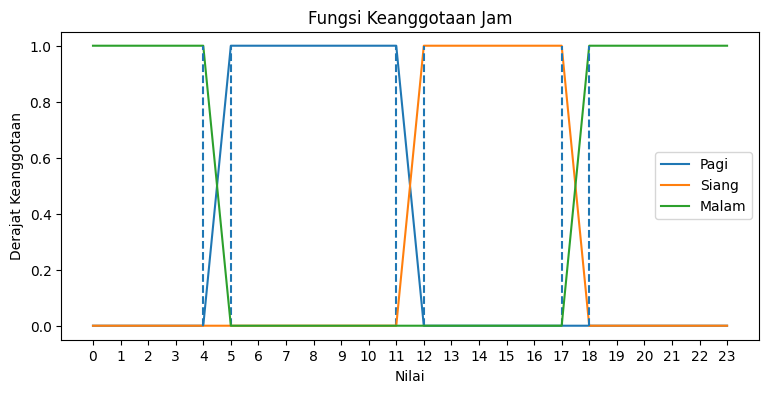

In [3]:
# Fungsi keanggotaan untuk cuaca
def fungsi_keanggotaan_cuaca(x):
    cerah = representasi_trapesium(x, 0, 0, 0,5 )
    berawan = representasi_trapesium(x, 0, 5, 15, 20)
    hujan = representasi_trapesium(x, 15, 20, 30, 35)
    sangat_hujan = representasi_linear_naik(x, 30, 35)
    return cerah, berawan, hujan, sangat_hujan

# Fungsi keanggotaan untuk intensitas kendaraan
def fungsi_keanggotaan_intensitas_kendaraan(x):
    sepi = representasi_linear_turun(x, 0, 10)
    ramai = representasi_trapesium(x, 0, 10, 20, 30)
    macet = representasi_linear_naik(x, 20, 30)
    return sepi, ramai, macet

def fungsi_keanggotaan_jam(x):
    pagi = representasi_trapesium(x, 4, 5, 11, 12)

    siang = representasi_trapesium(x, 11, 12, 17, 18)

    malam = np.maximum(
        representasi_trapesium(x, 17, 18, 23, 24),
        representasi_trapesium(x, 0, 0, 4, 5)
    )

    return pagi, siang, malam


def plot_membership_functions(x, y, labels, title):
    plt.figure(figsize=(9, 4))
    plt.xticks(x)
    for i in range(len(y)):
        plt.plot(x, y[i], label=labels[i])
        differences = np.diff(y[i])

        # Temukan indeks di mana terjadi perubahan tanda
        turning_point_indices = np.where(np.diff(np.sign(differences)))[0] + 1
        turning_point_indices = turning_point_indices[y[i][turning_point_indices] == 1]

        # print("Indeks titik kritis:", turning_point_indices)
        # print("Nilai titik kritis:", y[i][turning_point_indices])
        for j in turning_point_indices:
            plt.vlines(x[j], 0, y[i][j], linestyle="dashed")

    plt.title(title)
    plt.xlabel("Nilai")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.show()

# Range untuk variabel cuaca
x_cuaca = np.arange(0, 40, 5, dtype=float)

# Range untuk variabel intensitas kendaraan
x_intensitas = np.arange(0, 40, 5, dtype=float)

# Range untuk variabel jam
x_jam = np.arange(0, 24, 1, dtype=float)

# Fungsi keanggotaan untuk cuaca
y_cuaca = fungsi_keanggotaan_cuaca(x_cuaca)

# Fungsi keanggotaan untuk intensitas kendaraan
y_intensitas = fungsi_keanggotaan_intensitas_kendaraan(x_intensitas)

#fungsi keanggotaan untuk jam
y_jam = fungsi_keanggotaan_jam(x_jam)

# Plot grafik fuzzifikasi
plot_membership_functions(x_cuaca, y_cuaca, ["Cerah", "Berawan", "Hujan", "Sangat Hujan"], "Fungsi Keanggotaan Cuaca")
plot_membership_functions(x_intensitas, y_intensitas, ["Sepi", "Ramai", "Macet"], "Fungsi Keanggotaan Intensitas Kendaraan")
plot_membership_functions(x_jam, y_jam, ["Pagi", "Siang", "Malam"], "Fungsi Keanggotaan Jam")

# **Fuzzifikasi nilai cuaca dan intensitas kendaraan dan Jam**

In [4]:
def fuzzifikasi(cuaca, intensitas,jam):
    cerah, berawan, hujan, sangat_hujan = fungsi_keanggotaan_cuaca(cuaca)
    sepi, ramai, macet = fungsi_keanggotaan_intensitas_kendaraan(intensitas)
    pagi, siang, malam = fungsi_keanggotaan_jam(jam)

    # Hitung nilai keanggotaan untuk setiap kategori
    nilai_keanggotaan_cuaca = {
        'Cerah': cerah,
        'Berawan': berawan,
        'Hujan': hujan,
        'Sangat Hujan': sangat_hujan
    }

    nilai_keanggotaan_intensitas = {
        'Sepi': sepi,
        'Ramai': ramai,
        'Macet': macet
    }

    nilai_keanggotaan_jam = {
        'Pagi': pagi,
        'Siang': siang,
        'Malam': malam
    }

    # Filter nilai yang tidak sama dengan 0
    nilai_keanggotaan_cuaca_not_zero = {key: value for key, value in nilai_keanggotaan_cuaca.items() if not np.all(value == 0)}
    nilai_keanggotaan_intensitas_not_zero = {key: value for key, value in nilai_keanggotaan_intensitas.items() if not np.all(value == 0)}
    nilai_keanggotaan_jam_not_zero = {key: value for key, value in nilai_keanggotaan_jam.items() if not np.all(value == 0)}

    return nilai_keanggotaan_cuaca_not_zero, nilai_keanggotaan_intensitas_not_zero , nilai_keanggotaan_jam_not_zero

# Contoh penggunaan fungsi fuzzifikasi
input_cuaca = float(input("Masukkan cuaca \n(dalam skala 0 - 35, 0 = Cerah, 35 = Sangat Hujan):\n "))
input_intensitas = float(input("Masukkan intensitas kendaraan (dalam skala 0 - 30, 0 = Sepi, 30 = Macet):\n "))
input_jam = float(input("Masukkan jam (dalam skala 0 - 24 WIB): "))

nilai_keanggotaan_cuaca, nilai_keanggotaan_intensitas, nilai_keanggotaan_jam = fuzzifikasi(input_cuaca, input_intensitas,input_jam)

print_header("Hasil Fuzzifikasi")
print("Nilai Fuzzy Cuaca")
# Print nilai keanggotaan untuk setiap kategori cuaca
for kategori, nilai in nilai_keanggotaan_cuaca.items():
    print(f'- {kategori}: {nilai:.2f}')

print("------------------------------")
print("Nilai Fuzzy Intensitas Kendaraan")
# Print nilai keanggotaan untuk setiap kategori intensitas kendaraan
for kategori, nilai in nilai_keanggotaan_intensitas.items():
    print(f'- {kategori}: {nilai:.2f}')

print("------------------------------")
print("Nilai Fuzzy Jam")
# Print nilai keanggotaan untuk setiap kategori jam
for kategori, nilai in nilai_keanggotaan_jam.items():
    print(f'- {kategori}: {nilai:.2f}')


Masukkan cuaca 
(dalam skala 0 - 35, 0 = Cerah, 35 = Sangat Hujan):
 19
Masukkan intensitas kendaraan (dalam skala 0 - 30, 0 = Sepi, 30 = Macet):
 12
Masukkan jam (dalam skala 0 - 24 WIB): 11
------------------------------
      Hasil Fuzzifikasi       
------------------------------
Nilai Fuzzy Cuaca
- Berawan: 0.20
- Hujan: 0.80
------------------------------
Nilai Fuzzy Intensitas Kendaraan
- Ramai: 1.00
------------------------------
Nilai Fuzzy Jam
- Pagi: 1.00


# **Inferensi**

In [5]:
import pandas as pd
import numpy as np
from IPython.display import display

def inferensi(cuaca, intensitas, jam):
    # Data aturan untuk inferensi
    rules = {
        ('Cerah', 'Sepi', 'Pagi'): 'Nyaman',
        ('Cerah', 'Sepi', 'Siang'): 'Nyaman',
        ('Cerah', 'Sepi', 'Malam'): 'Nyaman',
        ('Cerah', 'Ramai', 'Pagi'): 'Kurang Nyaman',
        ('Cerah', 'Ramai', 'Siang'): 'Kurang Nyaman',
        ('Cerah', 'Ramai', 'Malam'): 'Kurang Nyaman',
        ('Cerah', 'Macet', 'Pagi'): 'Sangat Kurang Nyaman',
        ('Cerah', 'Macet', 'Siang'): 'Sangat Kurang Nyaman',
        ('Cerah', 'Macet', 'Malam'): 'Sangat Kurang Nyaman',
        ('Berawan', 'Sepi', 'Pagi'): 'Nyaman',
        ('Berawan', 'Sepi', 'Siang'): 'Nyaman',
        ('Berawan', 'Sepi', 'Malam'): 'Nyaman',
        ('Berawan', 'Ramai', 'Pagi'): 'Kurang Nyaman',
        ('Berawan', 'Ramai', 'Siang'): 'Kurang Nyaman',
        ('Berawan', 'Ramai', 'Malam'): 'Kurang Nyaman',
        ('Berawan', 'Macet', 'Pagi'): 'Sangat Kurang Nyaman',
        ('Berawan', 'Macet', 'Siang'): 'Sangat Kurang Nyaman',
        ('Berawan', 'Macet', 'Malam'): 'Sangat Kurang Nyaman',
        ('Hujan', 'Sepi', 'Pagi'): 'Kurang Nyaman',
        ('Hujan', 'Sepi', 'Siang'): 'Kurang Nyaman',
        ('Hujan', 'Sepi', 'Malam'): 'Kurang Nyaman',
        ('Hujan', 'Ramai', 'Pagi'): 'Nyaman',
        ('Hujan', 'Ramai', 'Siang'): 'Nyaman',
        ('Hujan', 'Ramai', 'Malam'): 'Nyaman',
        ('Hujan', 'Macet', 'Pagi'): 'Kurang Nyaman',
        ('Hujan', 'Macet', 'Siang'): 'Kurang Nyaman',
        ('Hujan', 'Macet', 'Malam'): 'Kurang Nyaman',
        ('Sangat Hujan', 'Sepi', 'Pagi'): 'Sangat Kurang Nyaman',
        ('Sangat Hujan', 'Sepi', 'Siang'): 'Sangat Kurang Nyaman',
        ('Sangat Hujan', 'Sepi', 'Malam'): 'Sangat Kurang Nyaman',
        ('Sangat Hujan', 'Ramai', 'Pagi'): 'Kurang Nyaman',
        ('Sangat Hujan', 'Ramai', 'Siang'): 'Kurang Nyaman',
        ('Sangat Hujan', 'Ramai', 'Malam'): 'Kurang Nyaman',
        ('Sangat Hujan', 'Macet', 'Pagi'): 'Nyaman',
        ('Sangat Hujan', 'Macet', 'Siang'): 'Nyaman',
        ('Sangat Hujan', 'Macet', 'Malam'): 'Nyaman',
    }

    rules_digunakan = {}
    df_rules = pd.DataFrame([(key[0], key[1], key[2], value) for key, value in rules.items()],
    columns=['Cuaca', 'Intensitas', 'Jam', 'Kenyamanan'])
    print_header("Tabel Rules", width=50)
    display(df_rules)

    print_header("Rule di atas merupakan rule yang hanya berlaku di rentang jarak Telkom University ➡️ Lembang, Berdasarkan jarak -+ 22km di rute terbaik", width = 160)

    print_header("Rules yang digunakan dan implikasi MIN", width=50)

    # Proses inferensi berdasarkan input
    for kategori_cuaca, nilai_cuaca in cuaca.items():
        for kategori_intensitas, nilai_intensitas in intensitas.items():
            for kategori_jam, nilai_jam in jam.items():
                key = (kategori_cuaca, kategori_intensitas, kategori_jam)
                if key in rules:
                    output = rules[key]
                    implikasi_min = round(np.fmin(np.fmin(nilai_cuaca, nilai_intensitas), nilai_jam), 2)
                    if output not in rules_digunakan:
                        rules_digunakan[output] = []
                    rules_digunakan[output].append(implikasi_min)
                    print(f"𝜇{key} = {output}({implikasi_min})")

    return rules_digunakan

# Eksekusi inferensi
implikasi_min = inferensi(nilai_keanggotaan_cuaca, nilai_keanggotaan_intensitas, nilai_keanggotaan_jam)

# Menentukan implikasi MAX
implikasi_max = {}
print_header("Implikasi MAX", width=50)
for durasi, nilai in implikasi_min.items():
    implikasi_max[durasi] = np.max(nilai)
    print(f"𝜇{durasi} = MAX{nilai} = {np.max(nilai)}")


--------------------------------------------------
                   Tabel Rules                    
--------------------------------------------------


,Cuaca,Intensitas,Jam,Kenyamanan
0,Cerah,Sepi,Pagi,Nyaman
1,Cerah,Sepi,Siang,Nyaman
2,Cerah,Sepi,Malam,Nyaman
3,Cerah,Ramai,Pagi,Kurang Nyaman
4,Cerah,Ramai,Siang,Kurang Nyaman
5,Cerah,Ramai,Malam,Kurang Nyaman
6,Cerah,Macet,Pagi,Sangat Kurang Nyaman
7,Cerah,Macet,Siang,Sangat Kurang Nyaman
8,Cerah,Macet,Malam,Sangat Kurang Nyaman
9,Berawan,Sepi,Pagi,Nyaman


----------------------------------------------------------------------------------------------------------------------------------------------------------------
            Rule di atas merupakan rule yang hanya berlaku di rentang jarak Telkom University ➡️ Lembang, Berdasarkan jarak -+ 22km di rute terbaik             
----------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------
      Rules yang digunakan dan implikasi MIN      
--------------------------------------------------
𝜇('Berawan', 'Ramai', 'Pagi') = Kurang Nyaman(0.2)
𝜇('Hujan', 'Ramai', 'Pagi') = Nyaman(0.8)
--------------------------------------------------
                  Implikasi MAX                   
--------------------------------------------------
𝜇Kurang Nyaman = MAX[0.2] = 0.2
𝜇Nyaman = MAX[0.8] = 0.8


# **Mamdani**

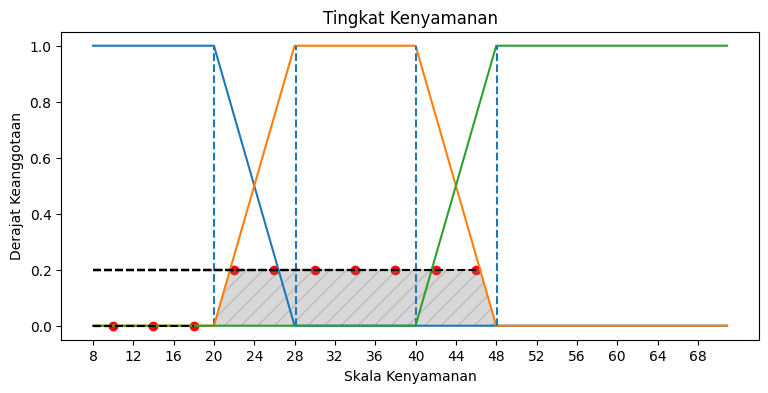

47.60 / 1.40
Hasil Defuzzifikasi: 34.00


In [8]:
def deffuzifikasi(x, y, implikasi, x_sampel):
    sangatkurangnyaman, kurangnyaman, nyaman = y
    nilai_keanggotaan_durasi = {
        'Sangat Kurang Nyaman': sangatkurangnyaman,
        'Kurang Nyaman': kurangnyaman,
        'Nyaman': nyaman
    }

    plt.figure(figsize=(9, 4))
    plt.xticks(np.arange(8, 71, 4))

    for durasi, nilai in nilai_keanggotaan_durasi.items():
        plt.plot(x, nilai, label=durasi)

        differences = np.diff(nilai)
        turning_point_indices = np.where(np.diff(np.sign(differences)))[0] + 1
        turning_point_indices = turning_point_indices[nilai[turning_point_indices] == 1]

        for j in turning_point_indices:
            plt.vlines(x[j], 0, nilai[j], linestyle="dashed")

    # Grafik arsir gabungan dari inferensi sebelumnya
    y_union = np.maximum(*[np.clip(nilai_keanggotaan_durasi[durasi], 0, nilai) for durasi, nilai in implikasi.items()])
    y_sampel = y_union[np.isin(np.round(x, 1), x_sampel)]

    plt.scatter(x_sampel, y_sampel, color='red', marker='o', label='Sampel')
    plt.hlines(y_sampel, min(x), x_sampel, linestyle="dashed", color='black')
    plt.fill_between(x, y_union, alpha=0.3, color='gray', hatch='//')

    plt.title("Tingkat Kenyamanan")
    plt.xlabel("Skala Kenyamanan")
    plt.ylabel("Derajat Keanggotaan")
    plt.show()

    hasil_defuzzifikasi = np.sum(x_sampel * y_sampel) / np.sum(y_sampel)
    print(f"{np.sum(x_sampel * y_sampel):.2f} / {np.sum(y_sampel):.2f}")
    return hasil_defuzzifikasi

def fungsi_keanggotaan_durasi(x):
    sangatkurangnyaman = representasi_linear_turun(x, 20, 28)
    kurangnyaman = representasi_trapesium(x, 20, 28, 40, 48)
    nyaman = representasi_linear_naik(x, 40, 48)
    return sangatkurangnyaman, kurangnyaman, nyaman

# Data rentang durasi kenyamanan
x_durasi = np.arange(8, 71, 0.1, dtype=float)
y_durasi = fungsi_keanggotaan_durasi(x_durasi)


# Contoh titik sampel
x_sampel = [10,14,18,22,26,30,34,38,42,46]

# n = int(input("Masukkan jumlah titik sampel : "))
# for i in range (n):
#   x_sampel = int(input(f"Masukkan titik sampel ke {i+1} : "))

# Asumsikan nilai implikasi dari inferensi Mamdani (contoh data)
implikasi_max = {
    'Sangat Kurang Nyaman': 0,
    'Kurang Nyaman': 0.2,
    'Nyaman': 0.8
}

# def input_aturan():
#     implikasi_max = {}
#     print("Masukkan nilai implikasi untuk setiap kategori (tekan Enter untuk selesai):")

#     while True:
#         key = input("Nama kategori (contoh: Sangat Kurang Nyaman, Kurang Nyaman, Nyaman): ")
#         if not key:  # Jika input kosong, keluar dari loop
#             break
#         try:
#             value = float(input(f"Masukkan nilai keanggotaan untuk '{key}': "))
#             implikasi_max[key] = value
#         except ValueError:
#             print("Nilai harus berupa angka! Coba lagi.")

#     return implikasi_max

# Hitung hasil defuzzifikasi
# input_aturan()
hasil_akhir = deffuzifikasi(x_durasi, y_durasi, implikasi_max, x_sampel)
print(f"Hasil Defuzzifikasi: {hasil_akhir:.2f}")

# **Sugeno**

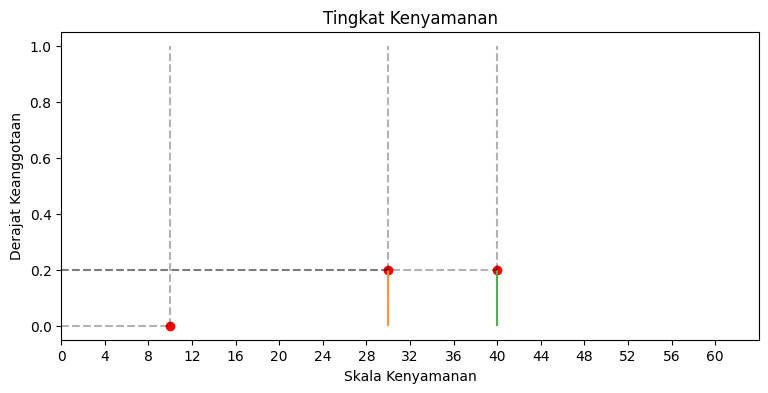

14.00 / 0.40
35.00


In [9]:
def sugeno(x, y, implikasi, x_sampel):
    sangatkurangnyaman, kurangnyaman, nyaman = y
    nilai_keanggotaan_durasi = {
        'Sangat Kurang Nyaman': sangatkurangnyaman,
        'Kurang Nyaman': kurangnyaman,
        'Nyaman': nyaman
    }
    colors = ['#448dc0', '#ff9436', '#4fb04f']
    plt.figure(figsize=(9, 4))
    plt.xticks(np.arange(0, 64, 4))
    plt.xlim(0, 64)

    # grafik arsir gabungan dari inferensi sebelumnya
    y_union = np.maximum(*[np.clip(nilai_keanggotaan_durasi[durasi], 0, nilai) for durasi, nilai in implikasi.items()])
    y_sampel = y_union[np.isin(np.round(x, 1), x_sampel)]

    plt.vlines(x_sampel, 0, 1, linestyle="dashed", color='black', alpha=0.3)
    for i, x_val in enumerate(x_sampel):
          color = colors[i % len(colors)]  # Mengambil warna dari daftar secara bergiliran
          plt.vlines(x_val, 0, y_sampel[i], linestyle="solid", color=color)
    plt.hlines(y_sampel, min(x), x_sampel, linestyle="dashed", color='black', alpha=0.3)
    plt.scatter(x_sampel, y_sampel, color='red', marker='o', label='Sampel')

    # Mengarsir area irisan di antara kedua kurva
    plt.title("Tingkat Kenyamanan")
    plt.xlabel("Skala Kenyamanan")
    plt.ylabel("Derajat Keanggotaan")
    # plt.legend()
    plt.show()
    print(f"{np.sum(x_sampel * y_sampel):.2f} / {np.sum(y_sampel):.2f}")
    return np.sum(x_sampel * y_sampel) / np.sum(y_sampel)

def sampel(implikasi_max, x_durasi, y_durasi):
    sampel = []
    range_fungsi_linguistik = {
        'Sangat Kurang Nyaman': [10],
        'Kurang Nyaman': [20, 40],
        'Nyaman': [40]  # Default value for 'Nyaman'
    }

    sangatkurangnyaman, kurangnyaman, nyaman = y_durasi  # Unpack membership functions

    nilai_keanggotaan_durasi = {
        'Sangat Kurang Nyaman': sangatkurangnyaman,
        'Kurang Nyaman': kurangnyaman,
        'Nyaman': nyaman
    }

    for nama_fungsi, implikasi_nilai in implikasi_max.items():
        if nama_fungsi == 'Kurang Nyaman':
            # Use average for 'Kurang Nyaman' as before
            sampel.append(int((range_fungsi_linguistik[nama_fungsi][0] + range_fungsi_linguistik[nama_fungsi][1]) / 2))
        else:
            # Find x value where membership is closest to implication value
            x_range = range_fungsi_linguistik[nama_fungsi]
            membership_values = nilai_keanggotaan_durasi[nama_fungsi][np.isin(np.round(x_durasi, 1), x_range)]

            if membership_values.size > 0:  # Check if any values found
                closest_index = np.abs(membership_values - implikasi_nilai).argmin()
                sampel.append(x_range[closest_index])
            else:  # Use default if no values found
                sampel.append(range_fungsi_linguistik[nama_fungsi][0])


    sampel.sort()
    return sampel

x_durasi = np.arange(0, 100, 0.1, dtype=float)
y_durasi = fungsi_keanggotaan_durasi(x_durasi)

titik_sampel = sampel(implikasi_max,x_durasi,y_durasi)
hasil_akhir = sugeno(x_durasi, y_durasi, implikasi_max, titik_sampel)

print(f"{hasil_akhir:.2f}")